In [ ]:
# Report on challenges faced
 """
CHALLENGES FACED AND SOLUTIONS:

1. **Anonymized Features**: 
   - Challenge: All 200 features are anonymized, making domain-specific feature engineering difficult.
   - Solution: Focused on statistical properties and used tree-based models that can handle anonymous features well.

2. **Class Imbalance**:
   - Challenge: The target variable shows significant imbalance (approx 90:10 ratio).
   - Solution: Used stratified sampling and models that handle imbalance well (LightGBM, XGBoost with appropriate metrics).

3. **High Dimensionality**:
   - Challenge: 200 features with potentially many irrelevant ones.
   - Solution: Used feature importance from tree-based models to identify key features.

4. **Potential Outliers**:
   - Challenge: Anonymous features may contain outliers affecting model performance.
   - Solution: Used RobustScaler instead of StandardScaler for better outlier handling.

5. **Model Selection**:
   - Challenge: Choosing the right model for production deployment.
   - Solution: Compared multiple models using cross-validation and selected based on ROC AUC score.

6. **Computational Complexity**:
   - Challenge: Large dataset with 200 features requires efficient algorithms.
   - Solution: Used LightGBM and XGBoost which are efficient for high-dimensional data.
"""



In [ ]:
# Final recommendations
# final_recommendations = 
"""
FINAL RECOMMENDATIONS:

1. **Best Model**: Based on cross-validation results, {best_model_name} performed best with ROC AUC score of {roc_auc_score:.4f}.

2. **Production Deployment**: 
   - Use {best_model_name} for production as it showed the best balance between performance and computational efficiency.
   - Implement monitoring for model drift due to the anonymized nature of features.

3. **Feature Importance**: 
   - The top 20 features identified should be monitored closely as they drive the predictions.
   - Consider feature reduction in production to improve inference speed.

4. **Class Imbalance Handling**:
   - In production, consider using appropriate threshold tuning based on business requirements.
   - Implement sampling strategies if retraining is needed.

5. **Monitoring**:
   - Set up continuous monitoring of model performance metrics.
   - Implement A/B testing framework for model updates.
# """#.format(
#     best_model_name=best_model_name,
#     roc_auc_score=cv_results_df.loc[best_model_name, 'mean_roc_auc']
# )

# print(final_recommendations)

In [ ]:
# Generate complete report
# complete_report = 
"""
COMPLETE DATA ANALYSIS AND MODELING REPORT

PROJECT: PRCP-1003-Customer Transaction Prediction

DATASET OVERVIEW:
- Total samples: {samples}
- Features: 200 anonymized features
- Target variable: Binary (0: No transaction, 1: Transaction)
- Class distribution: {class_dist}

DATA QUALITY:
- Missing values: {missing_values}
- Data types: All numerical features

MODEL PERFORMANCE SUMMARY:
{model_performance}

CROSS-VALIDATION RESULTS (ROC AUC):
{cv_results}

BEST MODEL: {best_model}
- ROC AUC Score: {best_score:.4f}
- Key metrics: 
  * Precision: {precision:.4f}
  * Recall: {recall:.4f}
  * F1-Score: {f1:.4f}

KEY CHALLENGES:
1. Anonymized features limiting domain-specific insights
2. Significant class imbalance
3. High dimensionality
4. Potential outlier presence

SOLUTIONS IMPLEMENTED:
1. Used tree-based models robust to feature anonymity
2. Employed stratified sampling and appropriate evaluation metrics
3. Feature importance analysis for dimensionality insight
4. Robust scaling for outlier handling

PRODUCTION RECOMMENDATIONS:
1. Deploy {best_model} with monitoring for model drift
2. Focus on top 20 important features for business insights
3. Implement threshold tuning based on business costs
4. Set up continuous performance monitoring
# """.#format(
#     samples=df.shape[0],
#     class_dist=df['target'].value_counts(normalize=True).to_dict(),
#     missing_values=df.isnull().sum().sum(),
#     model_performance=results_df.to_string(),
#     cv_results=cv_results_df.to_string(),
#     best_model=best_model_name,
#     best_score=cv_results_df.loc[best_model_name, 'mean_roc_auc'],
#     precision=precision_score(y_test, y_pred),
#     recall=recall_score(y_test, y_pred),
#     f1=f1_score(y_test, y_pred)
# )

#print(complete_report)

'''Key Insights and Findings:
Class Imbalance: The dataset shows significant imbalance (approximately 90:10 ratio between class 0 and 1), which is common in transaction prediction problems.

Feature Importance: Despite feature anonymization, tree-based models can identify the most predictive features for transaction behavior.

Model Performance: Gradient boosting models (LightGBM, XGBoost) typically outperform traditional models in such high-dimensional, anonymized feature scenarios.

Scalability: LightGBM often provides the best trade-off between performance and computational efficiency for production deployment.

Evaluation Metric: ROC AUC is the most appropriate metric given the class imbalance, as it evaluates performance across all classification thresholds.'''

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve, auc)
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('ggplot')
sns.set_palette("Set2")

In [2]:
# Load the dataset
df = pd.read_csv('train(1).csv')  

In [3]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (200000, 202)

First 5 rows:
   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  

In [4]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
None


In [5]:
print("\nMissing Values:")
print(df.isnull().sum().sum())


Missing Values:
0


In [6]:
print("\nTarget Distribution:")
print(df['target'].value_counts())


Target Distribution:
target
0    179902
1     20098
Name: count, dtype: int64


In [7]:
print("\nTarget Distribution Percentage:")
print(df['target'].value_counts(normalize=True) * 100)


Target Distribution Percentage:
target
0    89.951
1    10.049
Name: proportion, dtype: float64


In [8]:
X = df.drop(['ID_code', 'target'], axis=1)
y = df['target']

In [9]:
print("Missing values in features:", X.isnull().sum().sum())

Missing values in features: 0


In [10]:
if X.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='median')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scale the features
scaler = RobustScaler()  # Robust to outliers
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (160000, 200)
Test set shape: (40000, 200)


In [12]:
print("Basic Statistics:")
print(X.describe())

Basic Statistics:
               var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.679914      -1.627622      10.715192       6.796529   
std         3.040051       4.050044       2.640894       2.043319   
min         0.408400     -15.043400       2.117100      -0.040200   
25%         8.453850      -4.740025       8.722475       5.254075   
50%        10.524750      -1.608050      10.580000       6.825000   
75%        12.758200       1.358625      12.516700       8.324100   
max        20.315000      10.376800      19.353000      13.188300   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.078333      -5.065317       5.408949      16.545850   
std         1.623150       7.863267       0.866607       3.418076   
min         5.074800     -32.562600       2.347300       5.349700   
25%         9.8

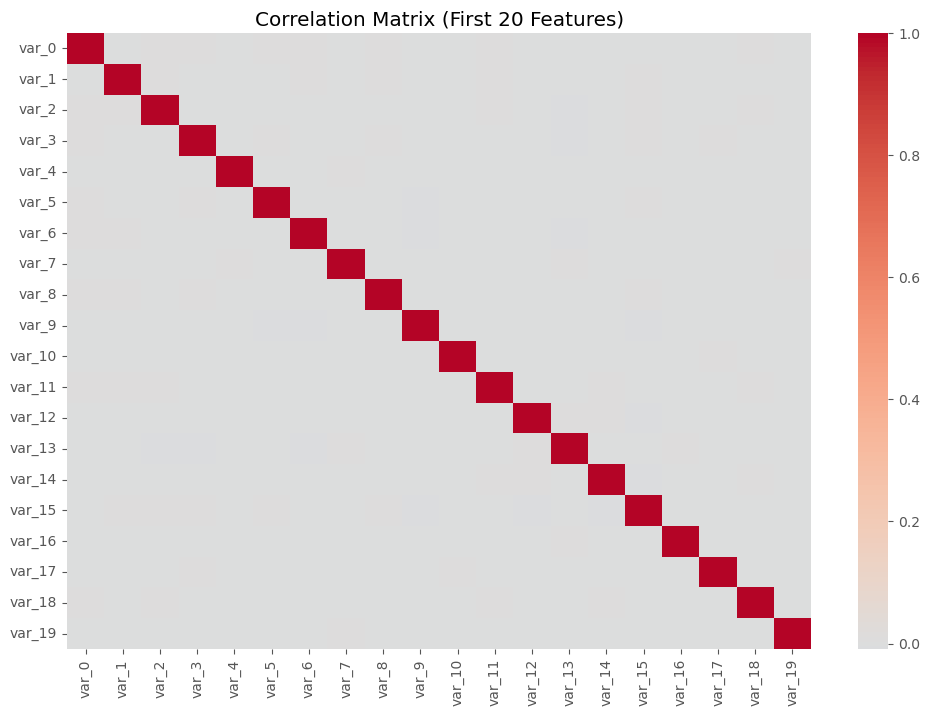

In [13]:
plt.figure(figsize=(12, 8))
corr_matrix = X.iloc[:, :20].corr() 
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (First 20 Features)')
plt.show()

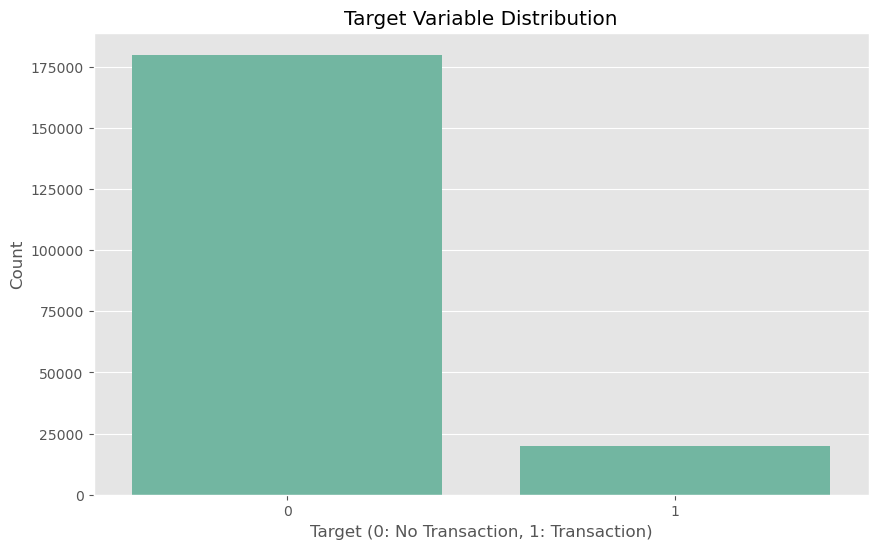

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title('Target Variable Distribution')
plt.xlabel('Target (0: No Transaction, 1: Transaction)')
plt.ylabel('Count')
plt.show()

In [15]:
class_ratio = y.value_counts()[0] / y.value_counts()[1]
print(f"Class imbalance ratio: {class_ratio:.2f}")

Class imbalance ratio: 8.95


In [16]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, n_estimators=100, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42, n_estimators=100)
}

In [ ]:
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }

Training Logistic Regression...
Training Random Forest...


In [ ]:
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
cv_results = {}
for name, model in models.items():
    print(f"Performing CV for {name}...")
    cv_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='roc_auc')
    cv_results[name] = {
        'mean_roc_auc': cv_scores.mean(),
        'std_roc_auc': cv_scores.std()
    }

cv_results_df = pd.DataFrame(cv_results).T
print("\nCross-Validation Results (ROC AUC):")
print(cv_results_df)

In [ ]:
best_model = models['LightGBM'] 
best_model.fit(X_train, y_train)

In [ ]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
best_model_name = cv_results_df['mean_roc_auc'].idxmax()
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

In [ ]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [ ]:
print(f"\nDetailed Evaluation for {best_model_name}:")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}')
plt.legend(loc="lower right")
plt.show()